# Exercise - 20 Newsgroups Dataset - Solution

### Introducing a solution

**In this notebook, we only give guidelines on how the problem can be solved. You can use it to resolve an error you might have encountered or just for inspiration. The notebook does not necessarily present the best solution.**

### Introducing the assignment

In this assignment, you will be introduced to the **20 newsgroups text dataset**. It is one of the real-world datasets that can be directly imported from sklearn. The dataset consists of 18000 newsgroup posts on 20 topics.

The code under the following sections is implemented:
* **Importing the necessary libraries** - **some** of the libraries necessary for the next section are imported. The rest we leave for you to import.
* **Reading the database** - in this section, we do the following:
    - fetch the 20 newsgroups dataset
    - display the type of the **newsgroups** variable
    - display the names of all classes
    - display the first post in the database just to have an idea of how the dataset looks like
    - display the targets
    - using the Counter class, count the number of times each target has occurred in the list of targets
    
Your task is to build a Naive Bayes model in a similar fashion to the spam-filtering model we have built during the course. Then, analyze your results with the help of a confusion matrix and a classification report. Test both the multinomial and the complement naive bayes classifiers.

*Hint: Make use of the **categories** variable to print out the classification report.*

Good luck and have fun!

### Importing the necessary libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

### Reading the database

In [2]:
newsgroups = fetch_20newsgroups()

In [3]:
type(newsgroups)

sklearn.utils._bunch.Bunch

In [4]:
categories = newsgroups.target_names

In [5]:
newsgroups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [6]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [7]:
Counter(newsgroups.target)

Counter({10: 600,
         15: 599,
         8: 598,
         9: 597,
         11: 595,
         7: 594,
         13: 594,
         14: 593,
         5: 593,
         2: 591,
         12: 591,
         3: 590,
         6: 585,
         1: 584,
         4: 578,
         17: 564,
         16: 546,
         0: 480,
         18: 465,
         19: 377})

### Defining the inputs and the target

In [8]:
inputs = newsgroups.data
target = newsgroups.target

In [9]:
len(target)

11314

### Creating the train-test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

### Tokenizing the YouTube comments

In [11]:
vectorizer = CountVectorizer()

x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

### Performing the classification

In [12]:
clf = MultinomialNB()

clf.fit(x_train_transf, y_train)

MultinomialNB()

### Performing the evaluation on the test dataset

In [13]:
y_test_pred = clf.predict(x_test_transf)

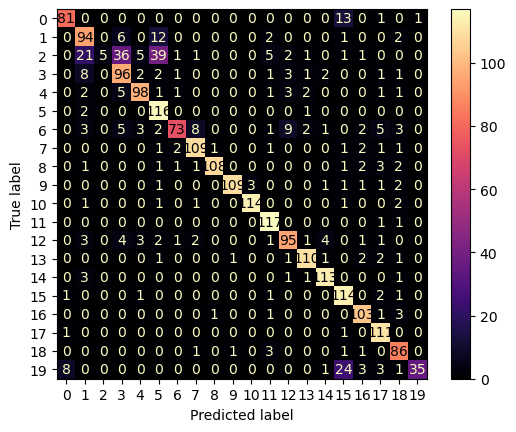

In [14]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [15]:
print(classification_report(y_test, y_test_pred, target_names = categories))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.84      0.87        96
           comp.graphics       0.68      0.80      0.74       117
 comp.os.ms-windows.misc       1.00      0.04      0.08       118
comp.sys.ibm.pc.hardware       0.63      0.81      0.71       118
   comp.sys.mac.hardware       0.88      0.85      0.86       115
          comp.windows.x       0.65      0.97      0.78       119
            misc.forsale       0.91      0.62      0.74       117
               rec.autos       0.89      0.92      0.90       119
         rec.motorcycles       0.98      0.90      0.94       120
      rec.sport.baseball       0.98      0.92      0.95       119
        rec.sport.hockey       0.97      0.95      0.96       120
               sci.crypt       0.87      0.98      0.92       119
         sci.electronics       0.83      0.81      0.82       118
                 sci.med       0.92      0.92      0.92       119
         